In [1]:
import numpy as np
import random

# функция для создания облака точек с центром x0 и радиусом r
def create_cloud(x0, r, n = 1000):
    dim  = x0.shape[0]
    points = []
    for i in range(n):
        x = x0 + r*np.random.random(dim)
        while(np.linalg.norm(x - x0) > r):
            x = x0 + r*np.random.random(dim)
            
        points.append(x)
        
    return np.array(points)
    

In [2]:
# функция для подсчета матрицы рассояний
def dist(X):
    dists = np.sqrt(np.sum((X[:, np.newaxis] - X)**2, axis=2))
    return dists

In [3]:
dim = 2
x_1 = np.zeros(dim)
x_2 = np.zeros(dim) + 1
r1 = 2
r2 = 2
# создадим два облака точек
cloud_1 = create_cloud(x_1, r1, n = 20)
cloud_2 = create_cloud(x_2, r2, n = 20)
# объединим их
cloud = np.vstack((cloud_1, cloud_2))
# получим матрицу расстояний
d = dist(cloud)

In [4]:
# занулим расстояния для первого облака
d[:cloud_1.shape[0]][:cloud_1.shape[0]] = 0.

In [5]:
f = open('cloud_distance.lower_distance_matrix', 'w')

In [6]:
# запишем в файл нижнетреугольную матрицу
for i in range(d.shape[0]):
    for j in range(i):
        f.write(str(d[i][j]))
        f.write(' ')
    f.write('\n')

In [7]:
f.close()

In [8]:
# запустим подсчет баркодов и резултат запишем в logs.txt

In [9]:
!ripser/ripser cloud_distance.lower_distance_matrix --dim 2 > logs.txt

In [10]:
f = open('logs.txt', 'r')



barcodes = []
b = []
for line in f:
    
    if line[1] == '[':
        x, y = line[2:-2].split(',')
        if y == ' ':
            y = float('inf')
        b.append([float(x), float(y)])
        #print(barcodes)

    if line[0:11] == 'persistence':
        if (len(b) == 0):
            continue
        #print(barcodes)
        barcodes.append(np.array(b))
        b = []

barcodes = np.array(barcodes)

In [11]:
import matplotlib.pyplot as plt

# функция для отрисовки баркодом
def plot_barcodes(arr, color_list = ['b','g','r','c','m','y','k']):
    sh = arr.shape[0]
    step = 0
    if (len(color_list) < sh):
        color_list *= sh
    for i in range(sh):
        barc = arr[i]
        plt.plot(barc[0], np.ones(2)*step, color = color_list[i], label = 'H{}'.format(i))
        for b in barc:
            plt.plot(b, np.ones(2)*step, color = color_list[i])
            step += 1
    plt.legend(loc = 'lower right')

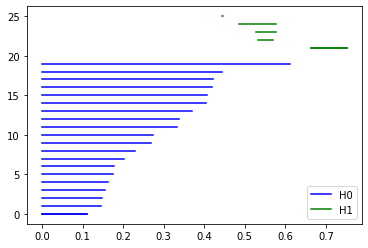

In [12]:
plot_barcodes(barcodes)